# Bitcoin Historical Price Forecasting 💹

This dataset, sourced from Investing.com, provides a detailed record of Bitcoin's daily price movements. Capturing key metrics such as opening, closing, high, low prices, and trading volume, the dataset spans from July 18, 2010, to February 9, 2024. It offers a comprehensive view of Bitcoin's market behavior, allowing researchers, analysts, and enthusiasts to delve into historical trends, patterns, and fluctuations.

## Import the Libraries 🏪

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

## Load the dataset 🗄️

In [3]:
df = pd.read_csv('/Bitcoin History.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 09, 2024","47,545.4","45,293.3","47,710.2","45,254.2",86.85K,4.97%
1,"Feb 08, 2024","45,293.3","44,346.2","45,579.2","44,336.4",66.38K,2.15%
2,"Feb 07, 2024","44,339.8","43,088.4","44,367.9","42,783.5",48.57K,2.91%
3,"Feb 06, 2024","43,087.7","42,697.6","43,375.5","42,566.8",33.32K,0.91%
4,"Feb 05, 2024","42,697.2","42,581.4","43,532.2","42,272.5",39.26K,0.27%


In [4]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4955 non-null   object
 1   Price     4955 non-null   object
 2   Open      4955 non-null   object
 3   High      4955 non-null   object
 4   Low       4955 non-null   object
 5   Vol.      4955 non-null   object
 6   Change %  4955 non-null   object
dtypes: object(7)
memory usage: 271.1+ KB


In [6]:
df.shape

(4955, 7)

### Descriptive Statistics

In [7]:
print("Summary Statistics:")
df.describe(include = "all")

Summary Statistics:


,Date,Price,Open,High,Low,Vol.,Change %
count,4955,4955,4955,4955,4955,4955,4955
unique,4955,4000,3993,3988,3997,4392,1544
top,"Feb 09, 2024",0.1,0.1,0.1,0.1,1.05M,0.00%
freq,1,100,100,97,101,6,425


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['date_year'] = df['Date'].dt.year
df['date_month_no'] = df['Date'].dt.month
df['date_day'] = df['Date'].dt.day
df['date_dow'] = df['Date'].dt.dayofweek
df['date_is_weekend'] = np.where(df['Date'].dt.day_name().isin(['Sunday', 'Saturday']), 1, 0)

In [9]:
columns = ['Price', 'Open', 'High', 'Low']
for column in columns:
    df[column] = df[column].str.replace(',', '').astype(float)

In [10]:
def transform_volume(volume):
    if volume == '-':
        return 0  # Return 0 for non-numeric values
    elif volume.endswith('K'):
        return float(volume[:-1]) * 1000
    elif volume.endswith('M'):
        return float(volume[:-1]) * 1000000
    elif volume.endswith('B'):
        return float(volume[:-1]) * 1000000000
    else:
        return float(volume)
df['Vol.'] = df['Vol.'].apply(transform_volume)

In [11]:
X = df['Open'].values.reshape(-1, 1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}%')

Model Accuracy: 0.9982502453499149%


In [13]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,date_year,date_month_no,date_day,date_dow,date_is_weekend
0,2024-02-09,47545.4,45293.3,47710.2,45254.2,86850.0,4.97%,2024,2,9,4,0
1,2024-02-08,45293.3,44346.2,45579.2,44336.4,66380.0,2.15%,2024,2,8,3,0
2,2024-02-07,44339.8,43088.4,44367.9,42783.5,48570.0,2.91%,2024,2,7,2,0
3,2024-02-06,43087.7,42697.6,43375.5,42566.8,33320.0,0.91%,2024,2,6,1,0
4,2024-02-05,42697.2,42581.4,43532.2,42272.5,39260.0,0.27%,2024,2,5,0,0


## Forecating 

In [14]:
df1 = df[['Date','Price']].copy(deep=True)
df1.set_index('Date',inplace = True)
df1.head()

,Price
Date,
2024-02-09,47545.4
2024-02-08,45293.3
2024-02-07,44339.8
2024-02-06,43087.7
2024-02-05,42697.2


## Exploratory Data Analysis 🔍

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


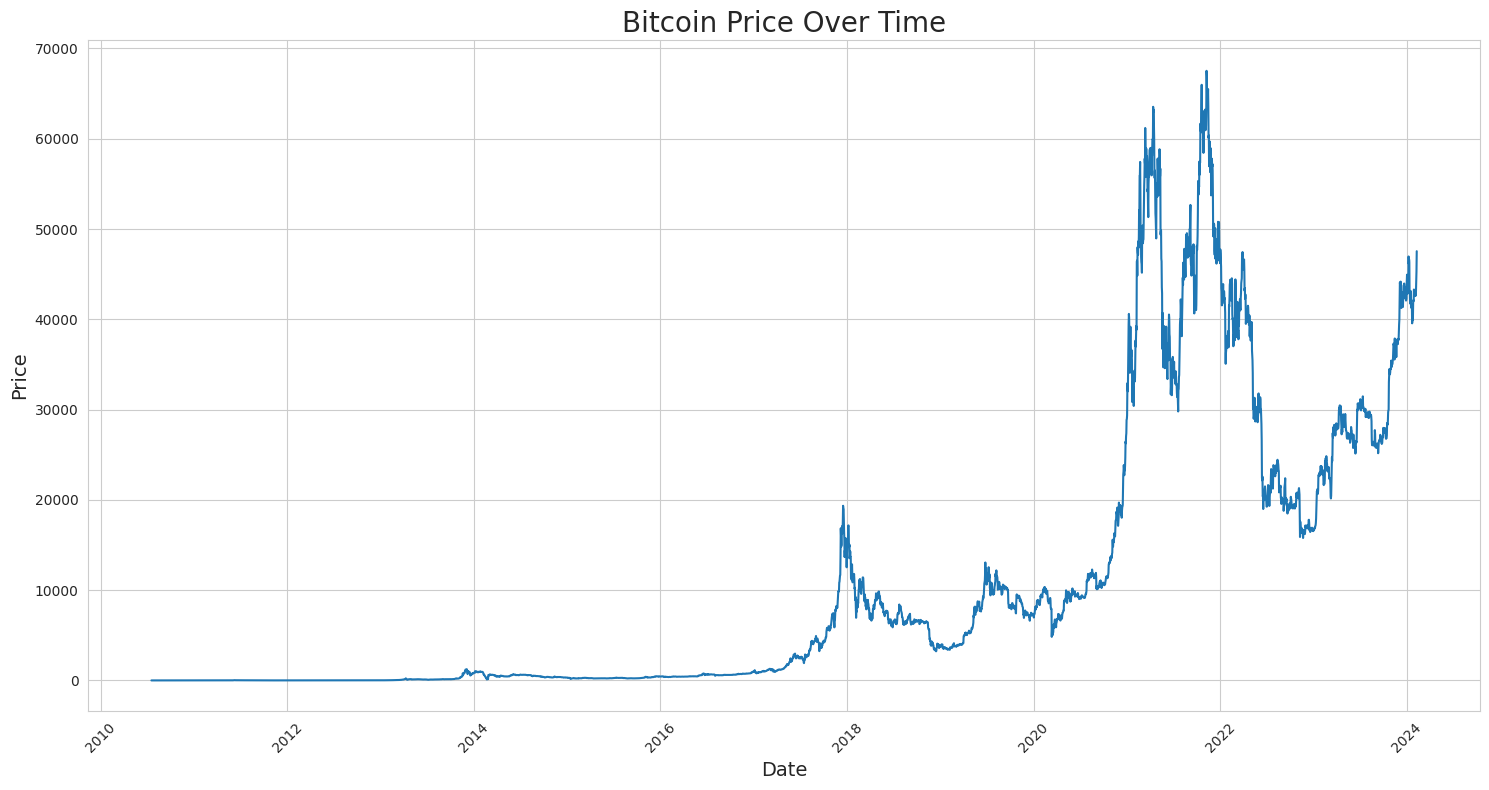

In [15]:
plt.figure(figsize=(15, 8))
sb.set_style("whitegrid")
ax=sb.lineplot(data=df1, x=df1.index, y='Price')
plt.xticks(rotation=45)

plt.title("Bitcoin Price Over Time", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.tight_layout()
plt.show()

## Stationarity Test 🧪

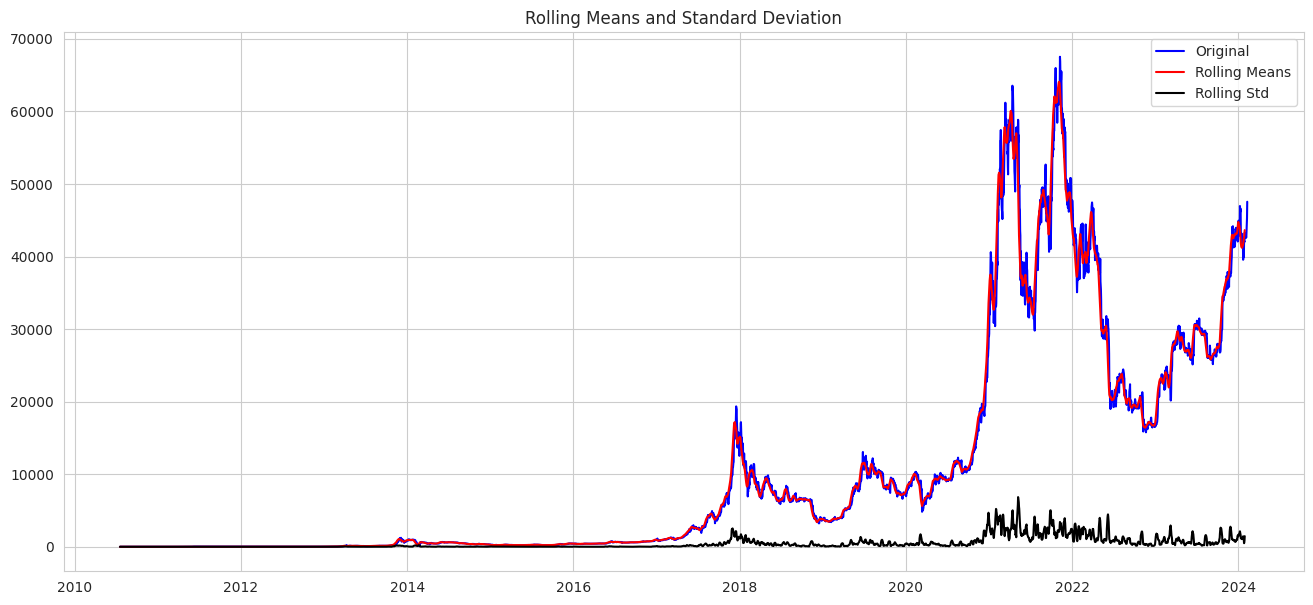

In [16]:
# Rolling statistics
rollmeans = df1.rolling(12).mean()
rollstd = df1.rolling(12).std()

plt.figure(figsize = (16, 7))

org = plt.plot(df1, color = 'blue', label = 'Original')
mean = plt.plot(rollmeans, color = 'red', label = 'Rolling Means')
std = plt.plot(rollstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Means and Standard Deviation')
plt.show(block = False)

In [17]:
# 2- ADF test
addfuller_result = adfuller(df1, autolag= 'AIC')

print(f'ADF Statistics: {addfuller_result[0]}')
print(f'p-value: {addfuller_result[1]}')

for key, value in addfuller_result[4].items():
    print('Critical values: ')
    print(f'{key}, {value}')

ADF Statistics: -2.5693176407709566
p-value: 0.09950593535981539
Critical values: 
1%, -3.4316792794963624
Critical values: 
5%, -2.862127395748108
Critical values: 
10%, -2.5670826718210007


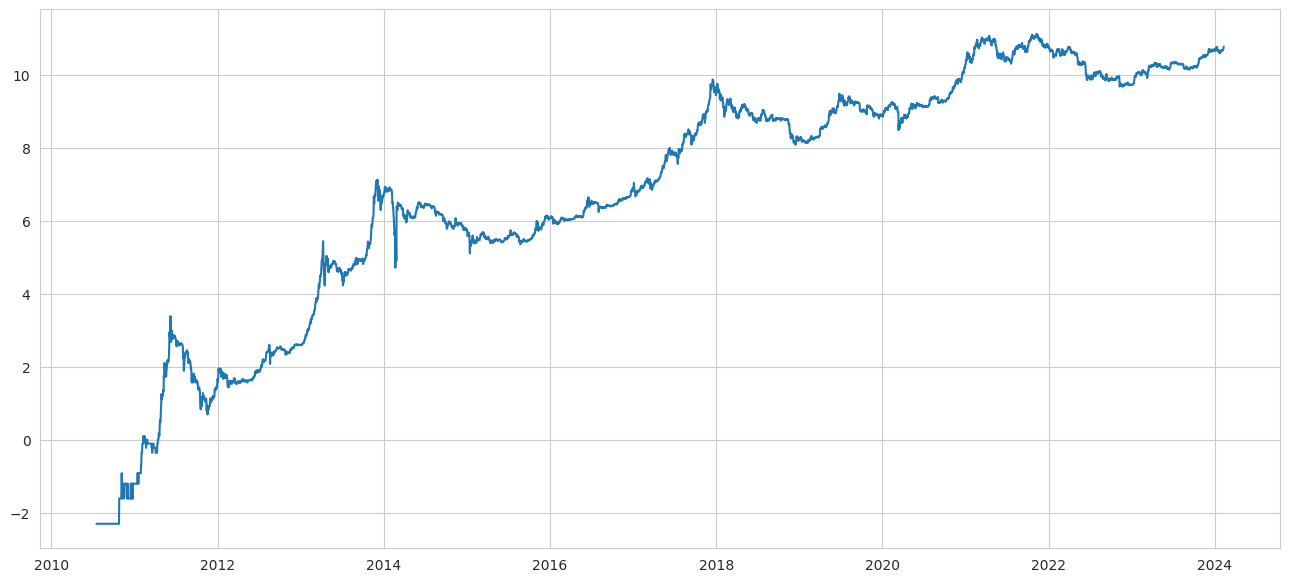

In [18]:
plt.figure(figsize = (16, 7))
ts_log = np.log(df1)
plt.plot(ts_log)

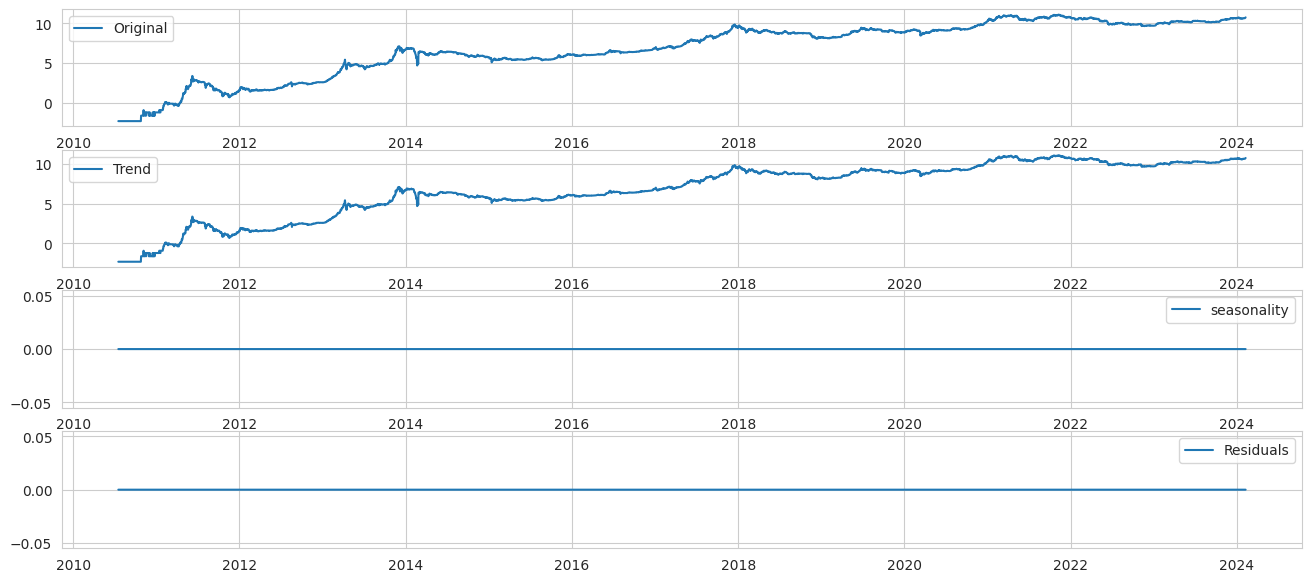

In [19]:
# Decomposition
decomposition = seasonal_decompose(ts_log, period = 1, model = 'additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

plt.figure(figsize = (16, 7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(resid, label = 'Residuals')
plt.legend(loc = 'best')

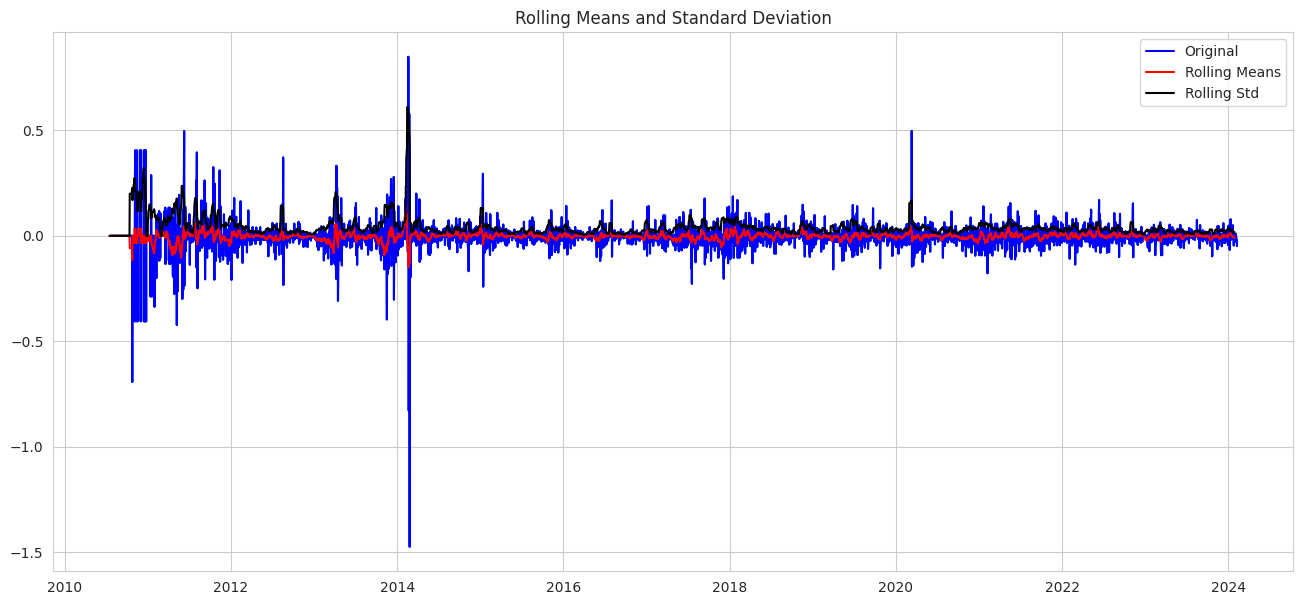

In [20]:
plt.figure(figsize = (16, 7))
fig = plt.figure(1)
ts_log_dif = ts_log - ts_log.shift()
plt.plot(ts_log_dif)

# Determing Rolling Statistics
rollmeans = ts_log_dif.rolling(12).mean()
rollstd = ts_log_dif.rolling(12).std()

# Plot rolling statistics
org = plt.plot(ts_log_dif, color = 'blue', label = 'Original')
mean = plt.plot(rollmeans, color = 'red', label = 'Rolling Means')
std = plt.plot(rollstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Means and Standard Deviation')
plt.show(block = False)

In [21]:
lag_acf = acf(ts_log_dif, nlags= 20)
lag_pacf = pacf(ts_log_dif, nlags= 20)

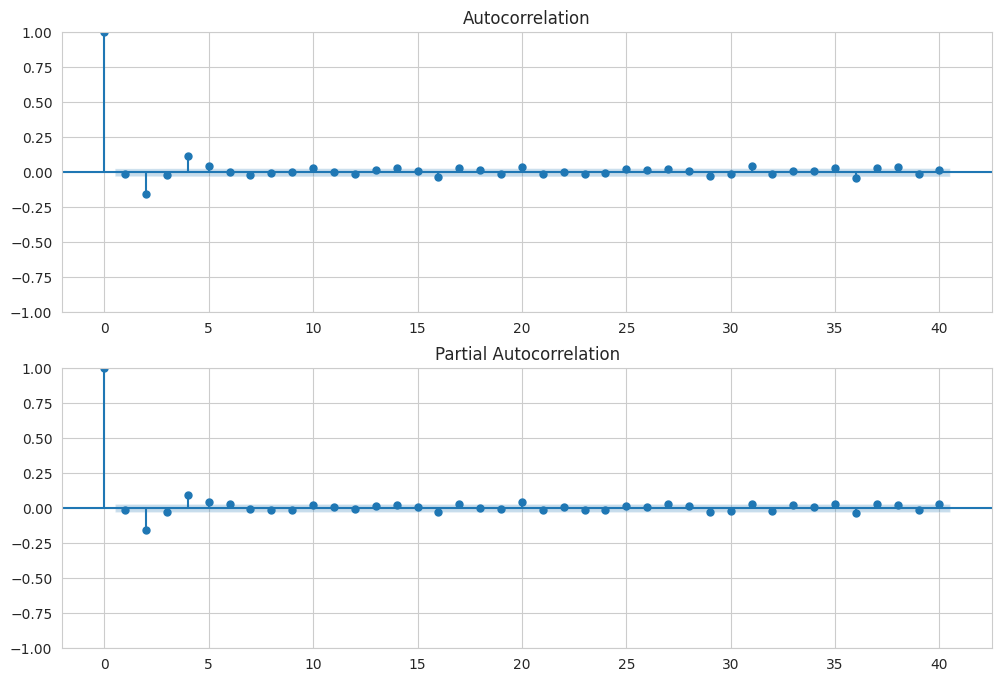

In [22]:
fig = plt.figure(figsize= (12, 8))
ax1 = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_dif.dropna(), lags = 40, ax = ax1)
ax2 = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_dif.dropna(), lags= 40, ax = ax2)

## Build the Model 🤖

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

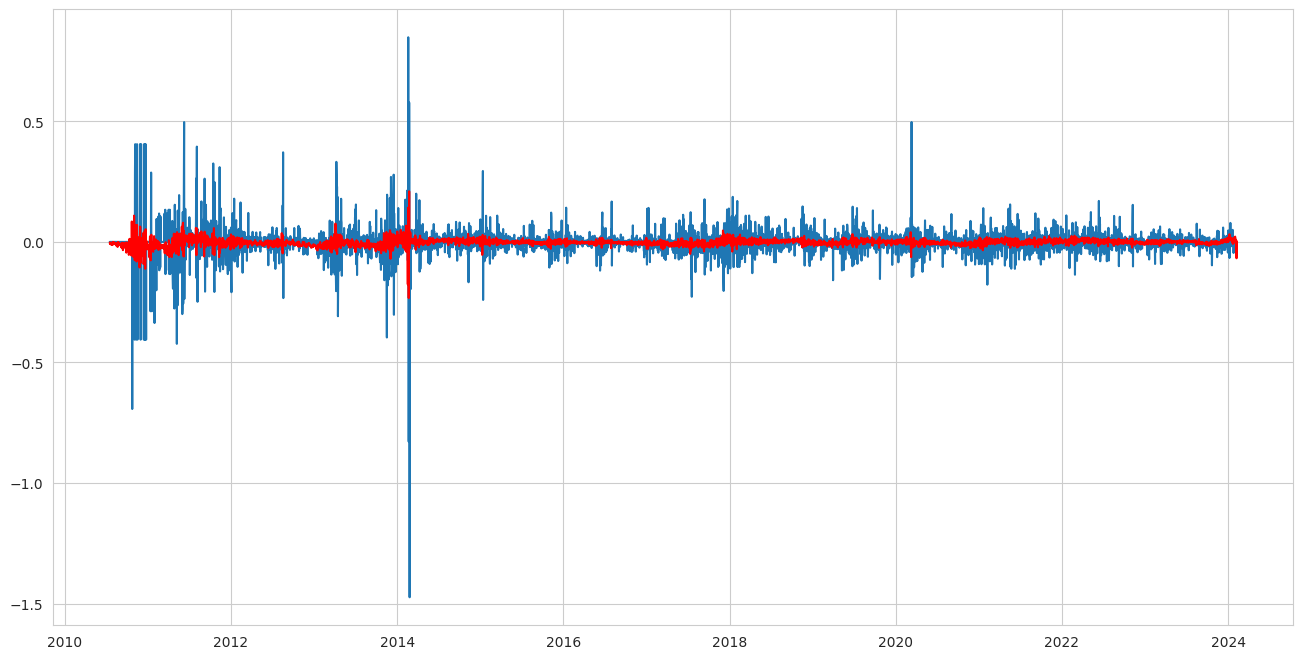

In [23]:
model = ARIMA(ts_log_dif, order = (27, 2, 27))
result_ARIMA = model.fit()

plt.figure(figsize = (16, 8))
plt.plot(ts_log_dif)
plt.plot(result_ARIMA.fittedvalues, color = 'red')

In [24]:
ARIMA_diff_prediction = pd.Series(result_ARIMA.fittedvalues, copy = True)
ARIMA_diff_prediction.head()

Date
2024-02-09    0.000000
2024-02-08    0.000000
2024-02-07   -0.067936
2024-02-06    0.005973
2024-02-05   -0.015227
dtype: float64

In [25]:
ARIMA_diff_prediction_cumsum = ARIMA_diff_prediction.cumsum()
ARIMA_diff_prediction_cumsum.head()

Date
2024-02-09    0.000000
2024-02-08    0.000000
2024-02-07   -0.067936
2024-02-06   -0.061963
2024-02-05   -0.077191
dtype: float64

In [26]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index = ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_prediction_cumsum, fill_value = 0)
ARIMA_log_prediction.head()

Date
2024-02-09    0.000000
2024-02-08    0.000000
2024-02-07   -0.067936
2024-02-06   -0.061963
2024-02-05   -0.077191
dtype: float64

In [27]:
result_ARIMA.predict(10, 20)

Date
2024-01-30    0.016824
2024-01-29    0.019586
2024-01-28    0.017195
2024-01-27    0.005056
2024-01-26    0.012750
2024-01-25    0.006599
2024-01-24   -0.006754
2024-01-23    0.004588
2024-01-22   -0.004442
2024-01-21   -0.007080
2024-01-20    0.008306
Name: predicted_mean, dtype: float64